In [ ]:
import scipy.io
import numpy as np
from mne.io import RawArray, Raw
from mne.channels import make_standard_montage
from mne import create_info
import matplotlib.pyplot as plt
path = r"C:\Users\bci\mne_data\MNE-tsinghua-data\upload\yijun\S1.mat"
path_sunsun = r"C:\Users\bci\mne_data\MNE-tsinghua-data\upload\yijun\sunsun.mat"
raw_mat = scipy.io.loadmat(path)
raw_mat_sunsun = scipy.io.loadmat(path_sunsun)

In [151]:
epoch_data = raw_mat["data"] * 1e-6
print(epoch_data.shape)

epoch_data_sunsun = raw_mat_sunsun["data"]
print(epoch_data_sunsun.shape)

(64, 1500, 40, 6)
(9, 925, 9, 5)


In [144]:
epoch_data_sunsun[8,:,:,:]

array([[[20.,  2., 11., 12., 10.],
        [ 3., 12., 12., 11., 11.],
        [ 1., 10., 20., 20., 21.],
        ...,
        [10., 20.,  3., 10.,  1.],
        [ 2.,  1., 21.,  2.,  3.],
        [19., 19.,  1.,  1., 19.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.

In [145]:
stim = np.zeros((1, *epoch_data.shape[1:]))
stim.shape

(1, 1500, 40, 6)

In [146]:
stim[0, 125] = np.tile(
            np.arange(1, 41)[:, np.newaxis], (1, epoch_data.shape[-1])
        )
stim

array([[[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0.

In [147]:
np.tile(
            np.arange(1, 41)[:, np.newaxis], (1, epoch_data.shape[-1])
        )

array([[ 1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17],
       [18, 18, 18, 18, 18, 18],
       [19, 19, 19, 19, 19, 19],
       [20, 20, 20, 20, 20, 20],
       [21, 21, 21, 21, 21, 21],
       [22, 22, 22, 22, 22, 22],
       [23, 23, 23, 23, 23, 23],
       [24, 24, 24, 24, 24, 24],
       [25, 25, 25, 25, 25, 25],
       [26, 26, 26, 26, 26, 26],
       [27, 27, 27, 27, 27, 27],
       [28, 28, 28, 28, 28, 28],
       [29, 29, 29, 29, 29, 29],
       [30, 30, 30, 30, 30, 30],
       [31

In [148]:
epoch_data = np.concatenate((epoch_data, stim), axis=0)
epoch_data.shape

(65, 1500, 40, 6)

In [149]:
data = np.transpose(epoch_data, (0, 3, 2, 1))
print(data.shape)

data_sunsun = np.transpose(epoch_data_sunsun, (0, 3, 2, 1))
print(data_sunsun.shape)

(65, 6, 40, 1500)
(9, 5, 8, 925)


In [116]:
data[64,:,:,:]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [117]:
data_sunsun[8,:,:,:]

array([[[20.,  0.,  0., ...,  0.,  0.,  0.],
        [ 3.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 2.,  0.,  0., ...,  0.,  0.,  0.],
        [19.,  0.,  0., ...,  0.,  0.,  0.],
        [12.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 2.,  0.,  0., ...,  0.,  0.,  0.],
        [12.,  0.,  0., ...,  0.,  0.,  0.],
        [10.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [19.,  0.,  0., ...,  0.,  0.,  0.],
        [21.,  0.,  0., ...,  0.,  0.,  0.]],

       [[11.,  0.,  0., ...,  0.,  0.,  0.],
        [12.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [21.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [19.,  0.,  0., ...,  0.,  0.,  0.]],

       [[12.,  0.,  0., ...,  0.,  0.,  0.],
        [11.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        ..

In [118]:
montage = make_standard_montage("standard_1005")
montage.rename_channels(
    {ch_name: ch_name.upper() for ch_name in montage.ch_names}
)
montage

montage_sunsun = make_standard_montage("standard_1020")
montage_sunsun.rename_channels(
    {ch_name: ch_name.upper() for ch_name in montage_sunsun.ch_names}
)
montage_sunsun

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>

In [119]:
_CHANNELS = ["FP1","FPZ","FP2","AF3","AF4","F7","F5","F3","F1","FZ","F2","F4","F6","F8","FT7","FC5","FC3","FC1","FCZ","FC2","FC4","FC6","FT8","T7","C5","C3","C1","CZ","C2","C4","C6","T8","TP7","CP5","CP3","CP1","CPZ","CP2","CP4","CP6","TP8","P7","P5","P3","P1","PZ","P2","P4","P6","P8","PO7","PO5","PO3","POZ","PO4","PO6","PO8","O1","OZ","O2"]
ch_names = [ch_name.upper() for ch_name in _CHANNELS]
ch_names.insert(32, "M1")
ch_names.insert(42, "M2")
ch_names.insert(59, "CB1")
ch_names = ch_names + ["CB2", "STI 014"]
ch_types = ["eeg"] * 65
ch_types[59] = "misc"
ch_types[63] = "misc"
ch_types[-1] = "stim"


In [120]:
_CHANNELS_SUNSUN = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
_FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
_PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80]
ch_names_sunsun = [ch_name.upper() for ch_name in _CHANNELS_SUNSUN]
ch_types_sunsun = ["eeg"] * 9
ch_types_sunsun[-1] = "stim"


In [121]:
info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=250)
info

info_sunsun = create_info(ch_names=ch_names_sunsun, ch_types=ch_types_sunsun, sfreq=250)
info_sunsun

<Info | 7 non-empty values
 bads: []
 ch_names: FZ, C3, CZ, C4, PZ, PO7, OZ, PO8, STIM MARKERS
 chs: 8 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 9
 projs: []
 sfreq: 250.0 Hz
>

In [122]:
raw = RawArray(
        data=np.reshape(data[:, 0, ...], (data.shape[0], -1)), 
        info=info
    )
raw.set_montage(montage)


raw_sunsun = RawArray(
        data=np.reshape(data_sunsun[:, 0, ...], (data_sunsun.shape[0], -1)), 
        info=info_sunsun
    )
raw_sunsun.set_montage(montage_sunsun)

Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=8325
    Range : 0 ... 8324 =      0.000 ...    33.296 secs
Ready.


<RawArray | 9 x 8325 (33.3 s), ~604 kB, data loaded>

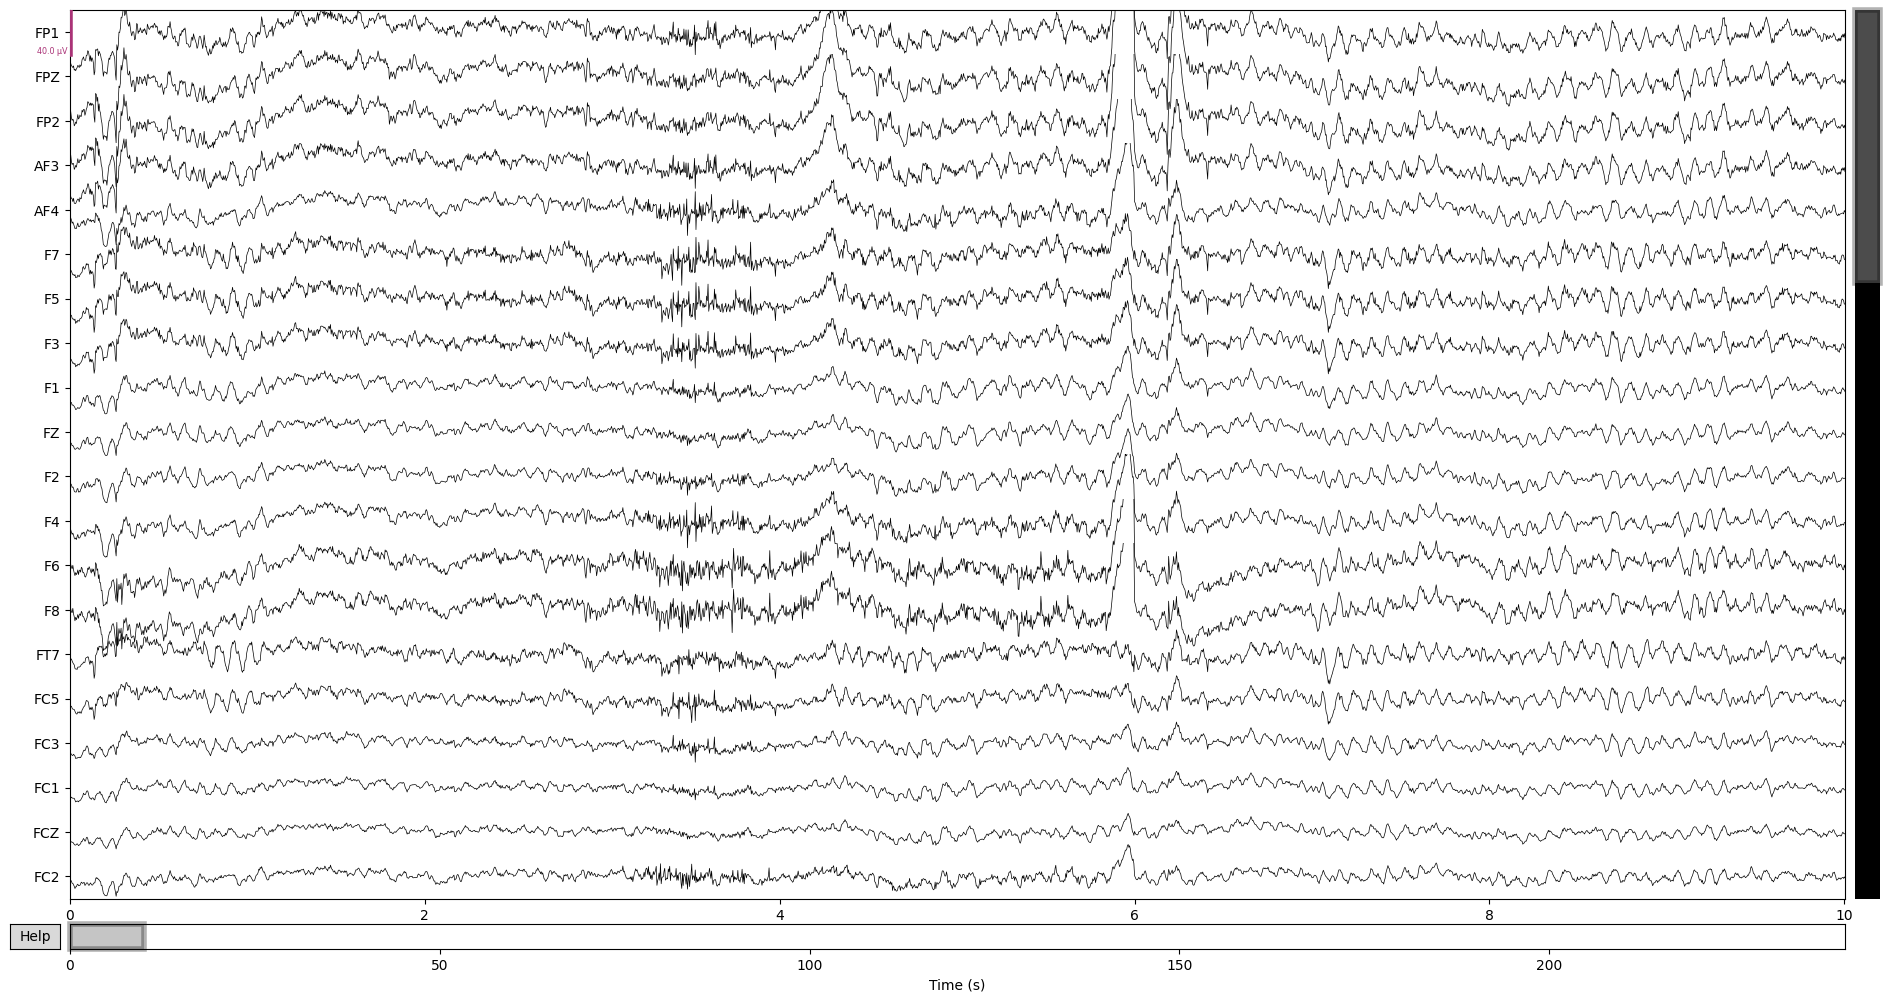

Effective window size : 1.024 (s)


c:\Users\bci\Documents\projects\MetaBCI\.metabci\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


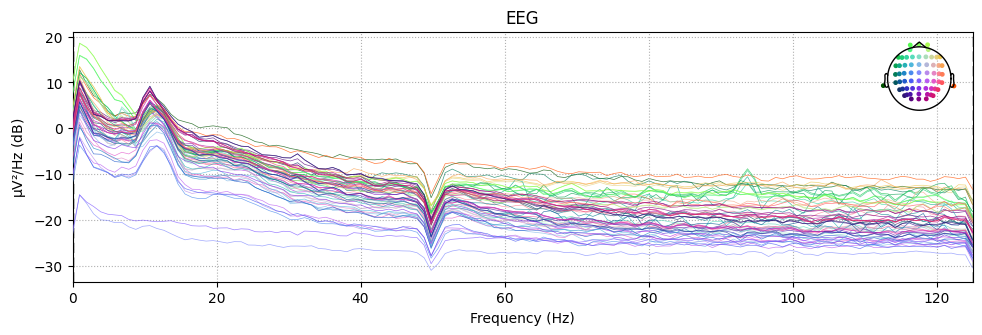

In [123]:
raw.plot()
plt.show()
raw.compute_psd().plot()
plt.show()

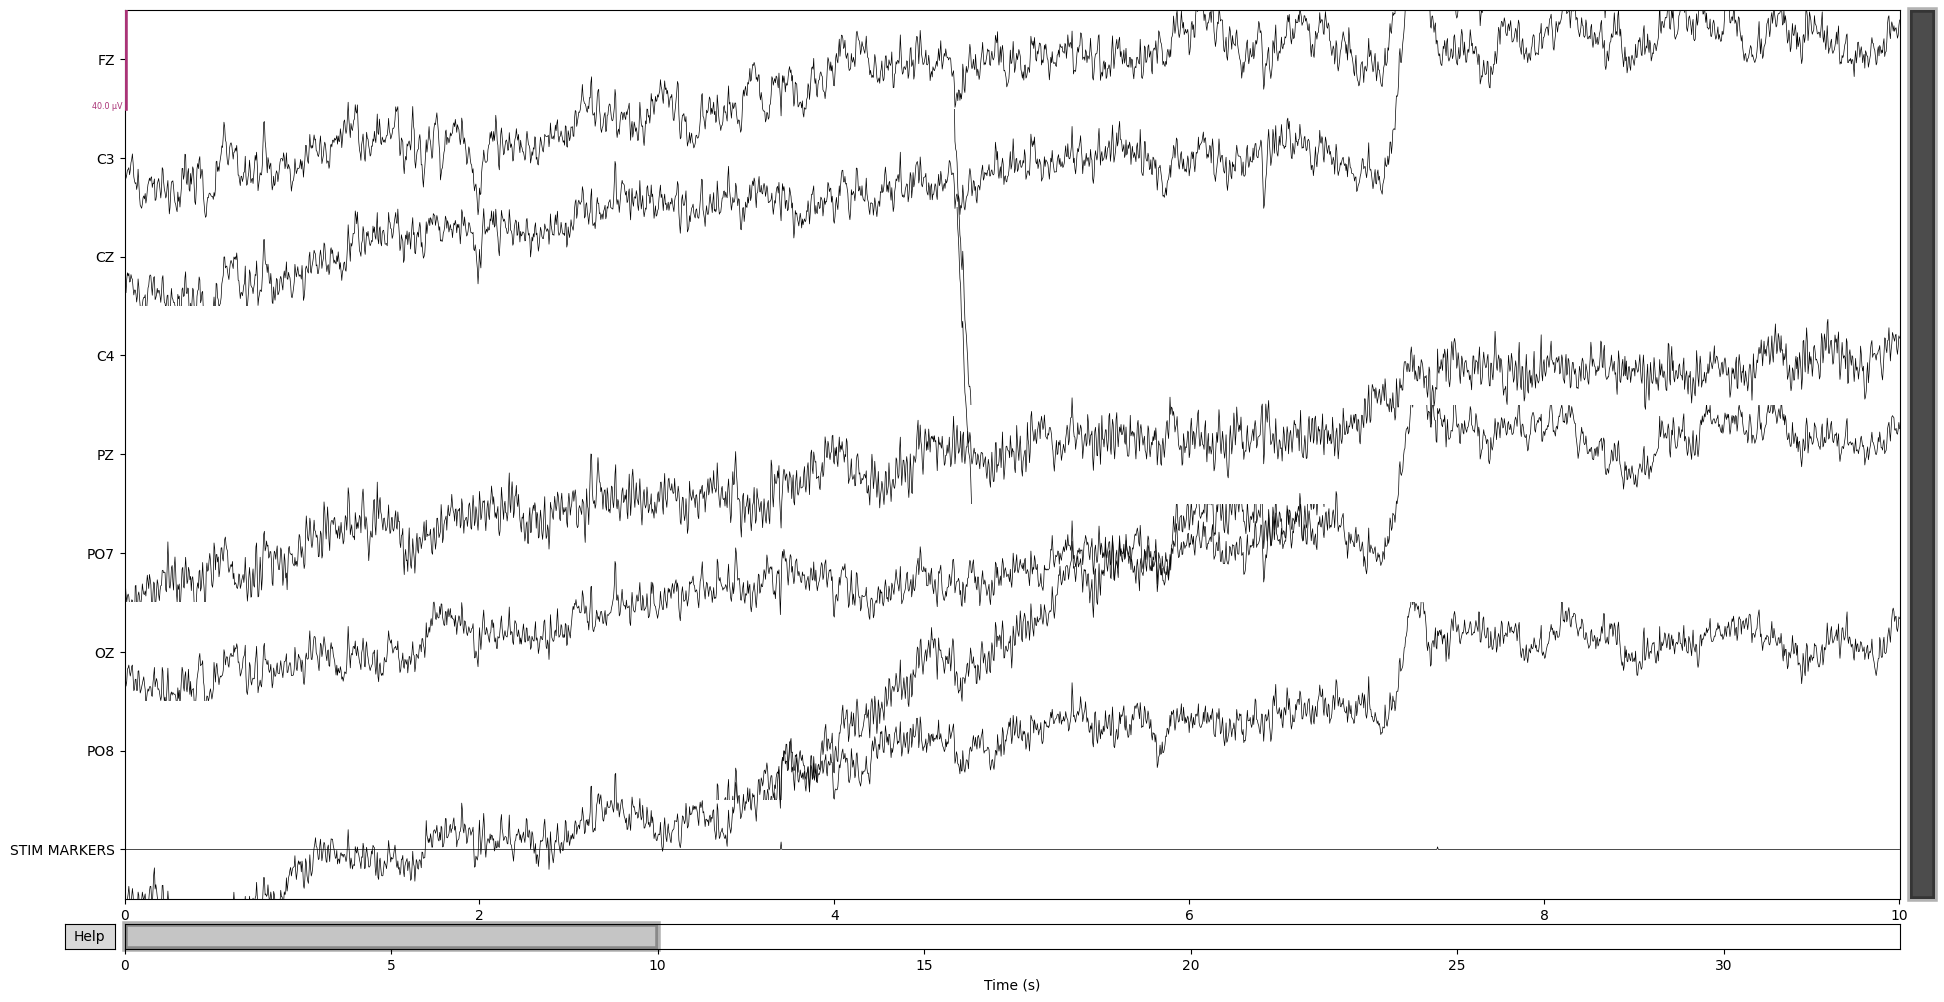

Effective window size : 1.024 (s)


c:\Users\bci\Documents\projects\MetaBCI\.metabci\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


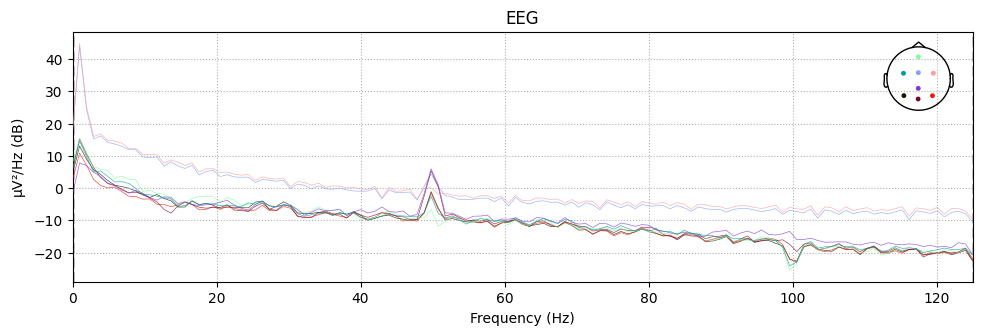

In [124]:
raw_sunsun.plot()
plt.show()
raw_sunsun.compute_psd().plot()
plt.show()

In [125]:
raw.get_data()[64,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [126]:
raw_sunsun.get_data().shape

(9, 8325)

In [127]:
raw_sunsun.get_data()[:, 7401]

array([0.21129626, 0.15526689, 0.36436158, 0.37762569, 0.68989168,
       0.13593736, 0.14428495, 0.14505852, 0.        ])

In [128]:
_FREQS = [8,9,10,11,12,13,14,15,8.2,9.2,10.2,11.2,12.2,13.2,14.2,15.2,8.4,9.4,10.4,11.4,12.4,13.4,14.4,15.4,8.6,9.6,10.6,11.6,12.6,13.6,14.6,15.6,8.8,9.8,10.8,11.8,12.8,13.8,14.8,15.8]
_PHASES = [0,0.5,1,1.5,0,0.5,1,1.5,0.5,1,1.5,0,0.5,1,1.5,0,1,1.5,0,0.5,1,1.5,0,0.5,1.5,0,0.5,1,1.5,0,0.5,1,0,0.5,1,1.5,0,0.5,1,1.5]
_EVENTS = {str(freq): (i + 1, (0, 5)) for i, freq in enumerate(_FREQS)}

In [129]:
_EVENTS

{'8': (1, (0, 5)),
 '9': (2, (0, 5)),
 '10': (3, (0, 5)),
 '11': (4, (0, 5)),
 '12': (5, (0, 5)),
 '13': (6, (0, 5)),
 '14': (7, (0, 5)),
 '15': (8, (0, 5)),
 '8.2': (9, (0, 5)),
 '9.2': (10, (0, 5)),
 '10.2': (11, (0, 5)),
 '11.2': (12, (0, 5)),
 '12.2': (13, (0, 5)),
 '13.2': (14, (0, 5)),
 '14.2': (15, (0, 5)),
 '15.2': (16, (0, 5)),
 '8.4': (17, (0, 5)),
 '9.4': (18, (0, 5)),
 '10.4': (19, (0, 5)),
 '11.4': (20, (0, 5)),
 '12.4': (21, (0, 5)),
 '13.4': (22, (0, 5)),
 '14.4': (23, (0, 5)),
 '15.4': (24, (0, 5)),
 '8.6': (25, (0, 5)),
 '9.6': (26, (0, 5)),
 '10.6': (27, (0, 5)),
 '11.6': (28, (0, 5)),
 '12.6': (29, (0, 5)),
 '13.6': (30, (0, 5)),
 '14.6': (31, (0, 5)),
 '15.6': (32, (0, 5)),
 '8.8': (33, (0, 5)),
 '9.8': (34, (0, 5)),
 '10.8': (35, (0, 5)),
 '11.8': (36, (0, 5)),
 '12.8': (37, (0, 5)),
 '13.8': (38, (0, 5)),
 '14.8': (39, (0, 5)),
 '15.8': (40, (0, 5))}

In [130]:
used_events = {ev:_EVENTS[ev][0] for ev in list(_EVENTS.keys())}
# used_intervals = {ev: dataset.events[ev][1] for ev in list(_EVENTS.keys())}
used_intervals = {
                ev: interval for ev, interval in zip(list(_EVENTS.keys()), [(0.14, 0.64)])
            }

In [131]:
used_events

{'8': 1,
 '9': 2,
 '10': 3,
 '11': 4,
 '12': 5,
 '13': 6,
 '14': 7,
 '15': 8,
 '8.2': 9,
 '9.2': 10,
 '10.2': 11,
 '11.2': 12,
 '12.2': 13,
 '13.2': 14,
 '14.2': 15,
 '15.2': 16,
 '8.4': 17,
 '9.4': 18,
 '10.4': 19,
 '11.4': 20,
 '12.4': 21,
 '13.4': 22,
 '14.4': 23,
 '15.4': 24,
 '8.6': 25,
 '9.6': 26,
 '10.6': 27,
 '11.6': 28,
 '12.6': 29,
 '13.6': 30,
 '14.6': 31,
 '15.6': 32,
 '8.8': 33,
 '9.8': 34,
 '10.8': 35,
 '11.8': 36,
 '12.8': 37,
 '13.8': 38,
 '14.8': 39,
 '15.8': 40}

In [132]:
used_intervals

{'8': (0.14, 0.64)}

In [133]:
3.7 - 1 / 250

3.696

In [134]:
data

array([[[[-3.03335762e-05, -2.94528503e-05, -3.14499016e-05, ...,
           4.17717361e-05,  4.03038597e-05,  2.77478905e-05],
         [ 1.22116871e-05,  6.97374344e-06,  3.28166580e-06, ...,
          -1.86489887e-05, -2.09535542e-05, -2.10815105e-05],
         [-3.61557045e-05, -3.10018291e-05, -2.95621262e-05, ...,
          -1.59356432e-05, -1.51336498e-05, -1.45037975e-05],
         ...,
         [ 1.77202244e-05,  1.21317692e-05,  1.14498749e-05, ...,
           7.41416550e-05,  7.22688522e-05,  6.26851082e-05],
         [ 7.29934502e-06,  1.08461180e-05,  1.41222982e-05, ...,
           4.15675688e-06, -1.29306495e-06, -2.33822212e-07],
         [-2.16404896e-05, -2.43347092e-05, -2.25957947e-05, ...,
           3.44835129e-05,  3.38515854e-05,  2.71414642e-05]],

        [[ 6.85251770e-05,  6.39815865e-05,  6.34147491e-05, ...,
          -3.08390293e-05, -2.47375584e-05, -2.98699341e-05],
         [ 5.23588257e-05,  4.68676376e-05,  4.18331223e-05, ...,
          -8.56972504e

In [135]:
import sys
import numpy as np
from tsinghua import Wang2016
from ssvep import SSVEP
from model_selection import (
    set_random_seeds,
    generate_kfold_indices, match_kfold_indices)

from base import generate_filterbank
from cca import TRCA


wp=[(5,90),(14,90),(22,90),(30,90),(38,90)]
ws=[(3,92),(12,92),(20,92),(28,92),(36,92)]

filterbank = generate_filterbank(wp,ws,srate=250,order=15,rp=0.5)

dataset = Wang2016()

paradigm = SSVEP(
    channels=['POZ', 'PZ', 'PO3', 'PO5', 'PO4', 'PO6', 'O1', 'OZ', 'O2'],
    intervals=[(0.14, 0.64)],
    srate=250
)

# add 5-90Hz bandpass filter in raw hook
def raw_hook(raw, caches):
    # do something with raw object
    raw.filter(5, 90, l_trans_bandwidth=2,h_trans_bandwidth=5,
        phase='zero-double')
    caches['raw_stage'] = caches.get('raw_stage', -1) + 1
    return raw, caches

def epochs_hook(epochs, caches):
    # do something with epochs object
    # print(epochs.event_id)
    caches['epoch_stage'] = caches.get('epoch_stage', -1) + 1
    return epochs, caches

def data_hook(X, y, meta, caches):
    # retrive caches from the last stage
    # print("Raw stage:{},Epochs stage:{}".format(caches['raw_stage'], caches['epoch_stage']))
    # do something with X, y, and meta
    caches['data_stage'] = caches.get('data_stage', -1) + 1
    return X, y, meta, caches

paradigm.register_raw_hook(raw_hook)
paradigm.register_epochs_hook(epochs_hook)
paradigm.register_data_hook(data_hook)

X, y, meta = paradigm.get_data(
    dataset,
    subjects=[1],
    return_concat=True,
    n_jobs=None,
    verbose=False)

--------ssssss, /upload/yijun/S1.mat.7z


In [136]:
X.shape, y.shape

((240, 9, 125), (240,))

In [137]:
meta

,subject,session,run,event,trial_id,dataset
0,1,session_0,run_0,8,0,wang2016
1,1,session_0,run_1,8,0,wang2016
2,1,session_0,run_2,8,0,wang2016
3,1,session_0,run_3,8,0,wang2016
4,1,session_0,run_4,8,0,wang2016
...,...,...,...,...,...,...
235,1,session_0,run_1,15.8,39,wang2016
236,1,session_0,run_2,15.8,39,wang2016
237,1,session_0,run_3,15.8,39,wang2016
238,1,session_0,run_4,15.8,39,wang2016


In [138]:
kfold = 6
indices = generate_kfold_indices(meta, kfold=kfold)

In [139]:
indices[1]

{'8': [(array([0, 4, 1, 5]), array([3]), array([2])),
  (array([4, 5, 1, 2]), array([0]), array([3])),
  (array([5, 3, 0, 1]), array([2]), array([4])),
  (array([1, 0, 3, 2]), array([4]), array([5])),
  (array([5, 2, 4, 1]), array([3]), array([0])),
  (array([5, 0, 3, 2]), array([4]), array([1]))],
 '9': [(array([4, 5, 0, 2]), array([1]), array([3])),
  (array([5, 2, 4, 1]), array([3]), array([0])),
  (array([5, 1, 0, 4]), array([3]), array([2])),
  (array([2, 3, 5, 0]), array([4]), array([1])),
  (array([1, 0, 4, 2]), array([3]), array([5])),
  (array([5, 0, 1, 3]), array([2]), array([4]))],
 '10': [(array([1, 0, 2, 3]), array([5]), array([4])),
  (array([1, 4, 0, 3]), array([2]), array([5])),
  (array([2, 0, 4, 1]), array([5]), array([3])),
  (array([3, 4, 0, 5]), array([1]), array([2])),
  (array([2, 5, 4, 3]), array([1]), array([0])),
  (array([0, 4, 2, 5]), array([3]), array([1]))],
 '11': [(array([0, 5, 3, 4]), array([2]), array([1])),
  (array([4, 1, 5, 0]), array([3]), array([2